Import necessary libraries

In [3]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.preprocessing import StandardScaler
import time


#### Goal :
####    -1 create toy data, perform
####    -2 perform k_means and spectral clustering on it using scikit
####    -3 perform k_means on digits and visualize centers for different number of centers


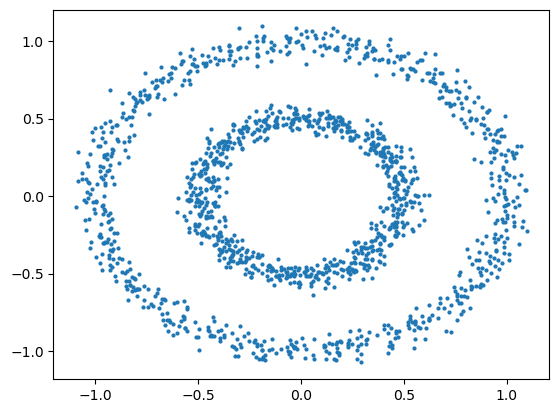

In [5]:
# #############################################################################
# Clustering on toy data
# #############################################################################
from sklearn import cluster, datasets, mixture

n_samples = 1500
# Generate and save circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
plt.clf()
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], s=4)
#plt.savefig('circles.png')




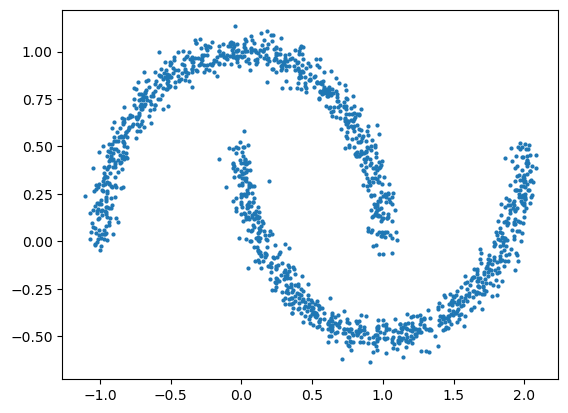

In [6]:
# Generate and save moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
plt.clf()
plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], s=4)
#plt.savefig('noisy_moons.png')


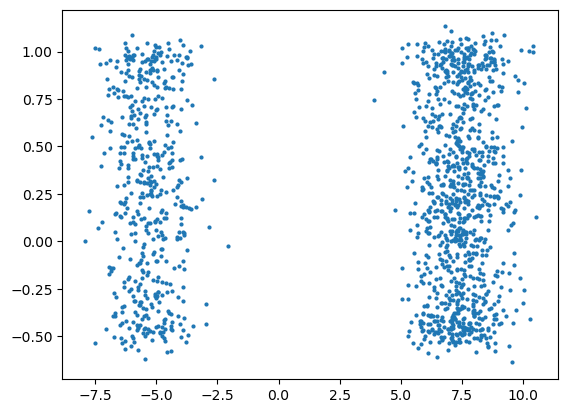

In [7]:
# Generate and save blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
plt.clf()
plt.scatter(blobs[0][:,0], noisy_moons[0][:,1], s=4)
#plt.savefig('blobs.png')


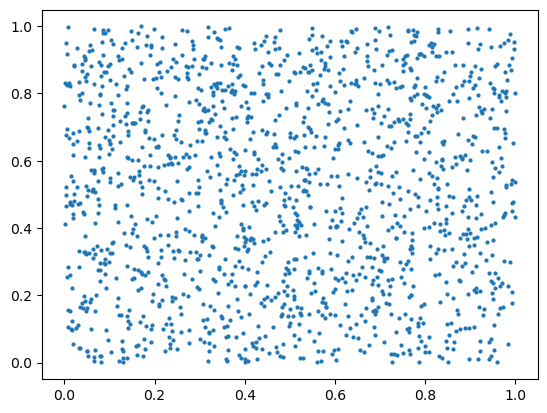

In [8]:
# Generate and save no structure
no_structure = np.random.rand(n_samples, 2), None
plt.clf()
plt.scatter(no_structure[0][:,0], no_structure[0][:,1], s=4)
#plt.savefig('no_structure.png')

C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


K-means  on noisy_moons performed in 1.118 sec
K-means  on noisy_circles performed in 0.070 sec


C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


K-means  on noisy_structure performed in 0.087 sec
K-means  on blobs performed in 0.057 sec


C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


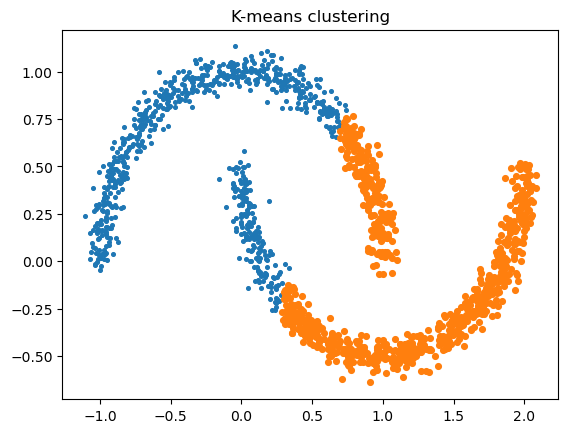

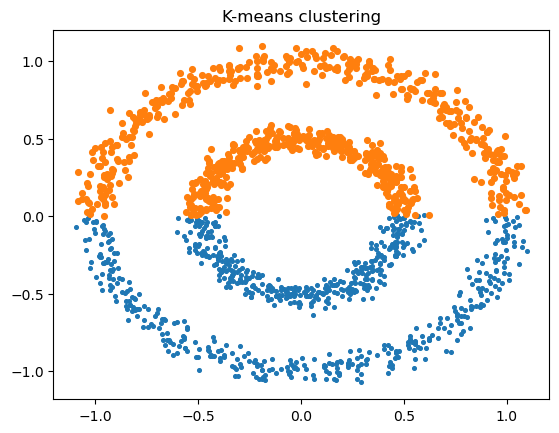

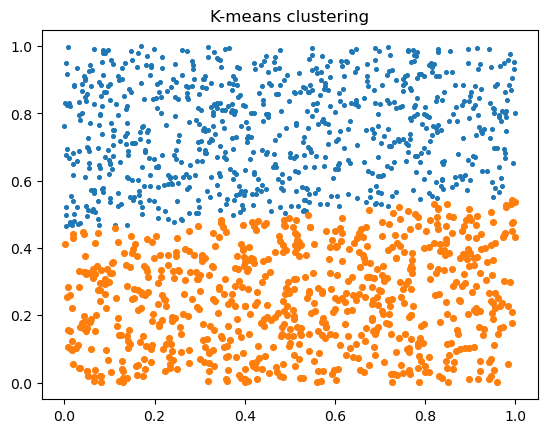

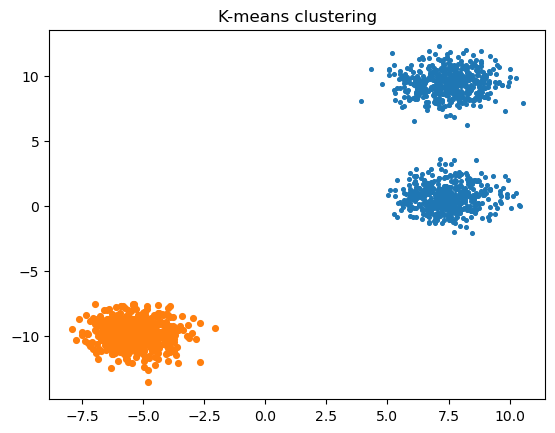

In [9]:
# #############################################################################
# Perform k-means with 2 clusters on each on these datasets
# k-means++ : intelligent initialization to speed the convergence
nb_clust=2
datasets=(
    (noisy_moons,'noisy_moons'),
    (noisy_circles,'noisy_circles'),
    (no_structure,'noisy_structure'),
    (blobs,'blobs'))
k_means=None
for data,name in datasets:
    if k_means is not None: del k_means
    k_means = KMeans(init='k-means++', n_clusters=nb_clust)
    t0 = time.time()
    k_means.fit(data[0])
    t_clust = time.time() - t0
    print('K-means  on %s performed in %.3f sec'%(name,t_clust))
    # visualize clusters
    clusters=k_means.labels_
    plt.figure()
    for i in range(nb_clust):
        plt.scatter(data[0][clusters==i,0], data[0][clusters==i,1], s=7+i*10)
        plt.title('K-means clustering')
        #plt.savefig('clustering_k_means_%s.png'%name)



C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


spectral clustering on noisy_moons performed in 3.143 sec


C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


spectral clustering on noisy_circles performed in 1.315 sec


C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


spectral clustering on noisy_structure performed in 0.594 sec


C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


spectral clustering on blobs performed in 0.230 sec


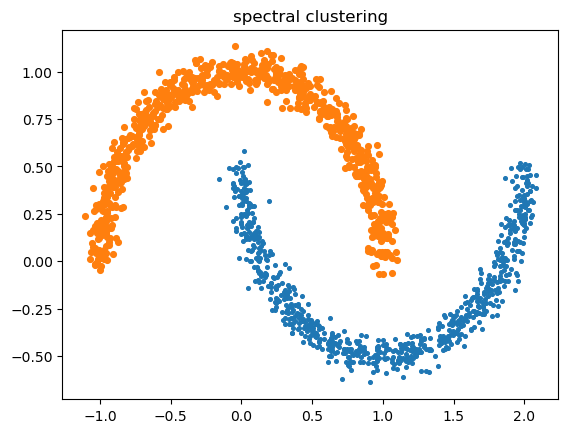

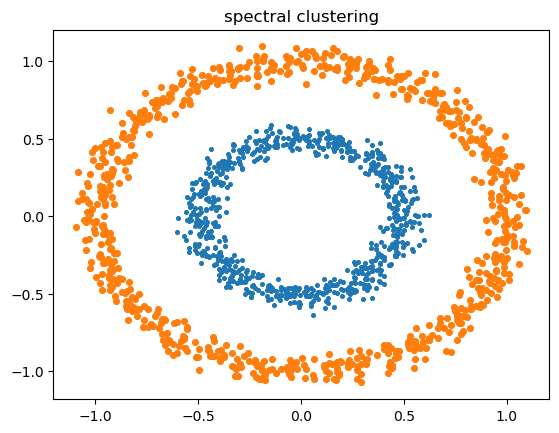

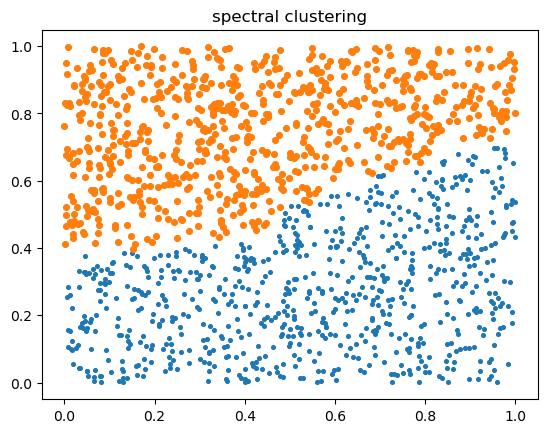

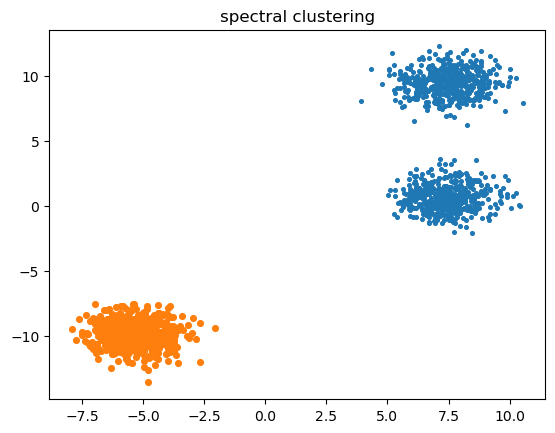

In [10]:

# #############################################################################
# Perform spectral clustering with 2 clusters on each on these datasets
# k-means++ : intelligent initialization to speed the convergence
nb_clust=2
datasets=(
    (noisy_moons,'noisy_moons'),
    (noisy_circles,'noisy_circles'),
    (no_structure,'noisy_structure'),
    (blobs,'blobs'))
spectral=None
for data,name in datasets:
    if spectral is not None: del spectral
#    data_tranform=StandardScaler().fit_transform(data[0])
    data_tranform=data[0]
    spectral = SpectralClustering(n_clusters=nb_clust, eigen_solver='arpack',affinity="nearest_neighbors")
    t0 = time.time()
    spectral.fit(data_tranform)
    t_clust = time.time() - t0
    print('spectral clustering on %s performed in %.3f sec'%(name,t_clust))
    clusters=spectral.labels_
    # visualize clusters
    plt.figure()
    for i in range(nb_clust):
        plt.scatter(data[0][clusters==i,0], data[0][clusters==i,1], s=7+i*10)
        plt.title('spectral clustering')
        #plt.savefig('clustering_spectral_%s.png'%name)


dataset processed in  0.098 sec


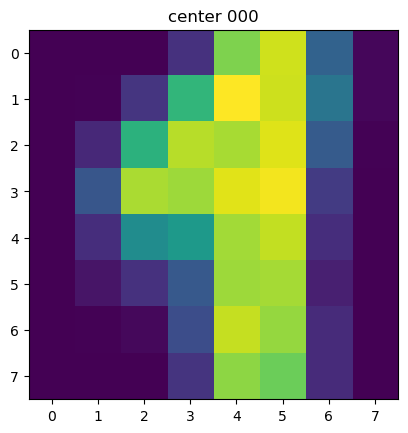

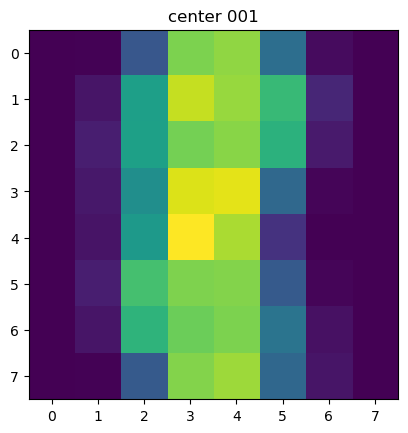

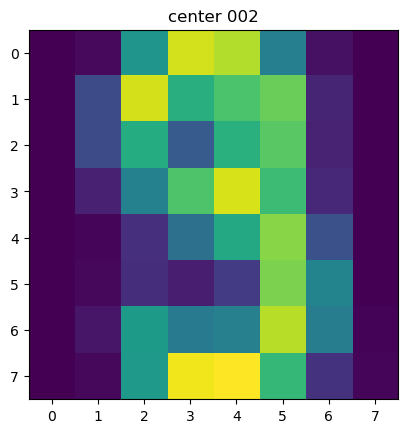

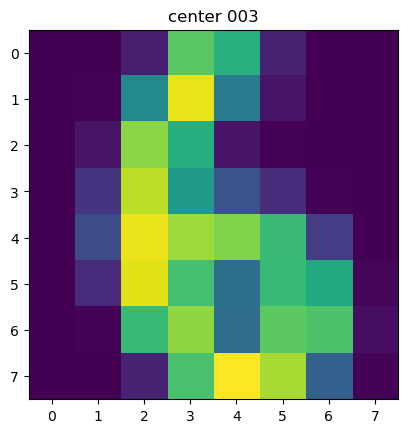

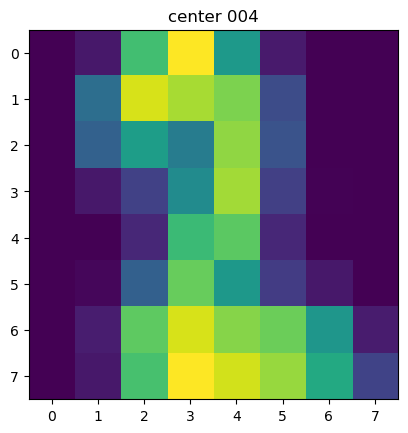

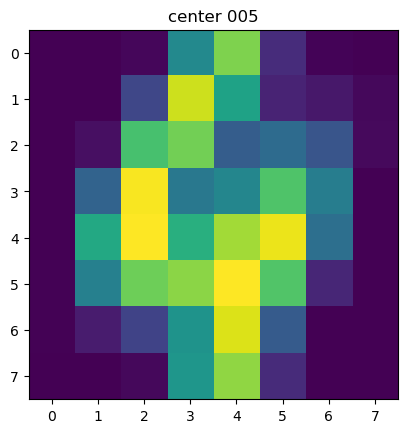

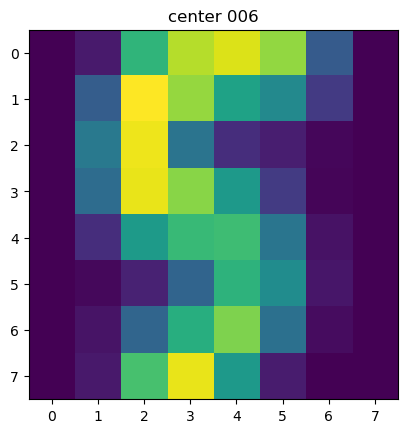

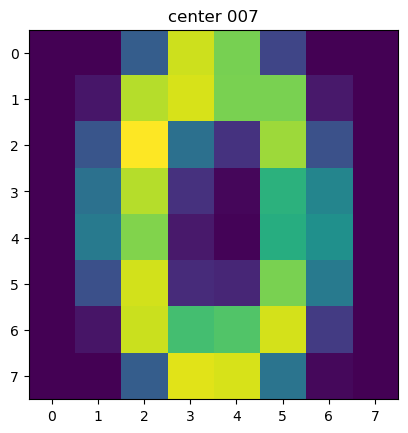

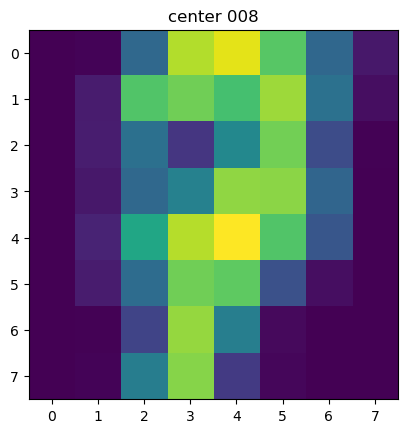

In [12]:
digits=load_digits()
# digits : a dataset of 1797 (8x8) images
# visulise and save the 10 first images
plt.clf()
for i in range(10):
    plt.imshow(digits['data'][i].reshape((8,8)))
    plt.title('digit %.3d'%i)
    #plt.savefig('digit_%.3d.png'%i)

# #############################################################################
# Initialize KMeans
# k-means++ : intelligent initialization to speed the convergence
plt.close()
nb_clust=9
k_means = KMeans(init='k-means++', n_clusters=nb_clust)
t0 = time.time()
k_means.fit(digits['data'])
t_clust = time.time() - t0
print('dataset processed in  %.3f sec'%(t_clust))
# visualize centers
for i in range(nb_clust):
    plt.figure()
    plt.imshow(k_means.cluster_centers_[i].reshape((8,8)))
    plt.title('center %.3d'%i)
    #plt.savefig('center_%.3d.png'%i)

